In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

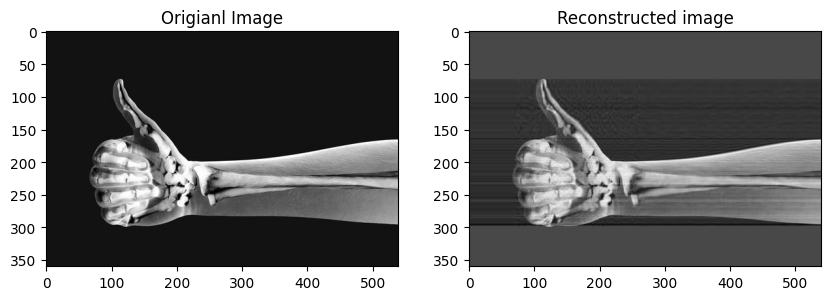

In [2]:
Xray_img=cv.imread("pca_xray.jpg",0)

covariance_matrix = np.cov(Xray_img)
eigenvalues,eigenvectors= np.linalg.eig(covariance_matrix)

eigenvalues = eigenvalues.reshape(-1, 1)
sorted_indices = np.argsort(eigenvalues, axis=0)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors=sorted_eigenvectors.reshape(360,360)


Y= np.transpose(sorted_eigenvectors) @ (Xray_img - np.mean(Xray_img))
Y = Y.reshape(360,540)

Img_reconstructed = sorted_eigenvectors[: , 0:50] @ Y[ 0:50 , :]
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Xray_img,cmap='gray')
plt.title('Origianl Image')
plt.subplot(1,2,2)
plt.imshow(Img_reconstructed,cmap='gray')
plt.title('Reconstructed image')
plt.show()

In [11]:
Num_of_Components=range(10,361,10)
mse_values = []
for i in Num_of_Components:
    Img_reconstructed_B = sorted_eigenvectors[:,0:i] @ Y[0:i,:]
    Img_reconstructed_B=Img_reconstructed_B.astype('uint8')
    mse = mean_squared_error(Xray_img.flatten(), Img_reconstructed_B.flatten())
    mse_values.append(mse)

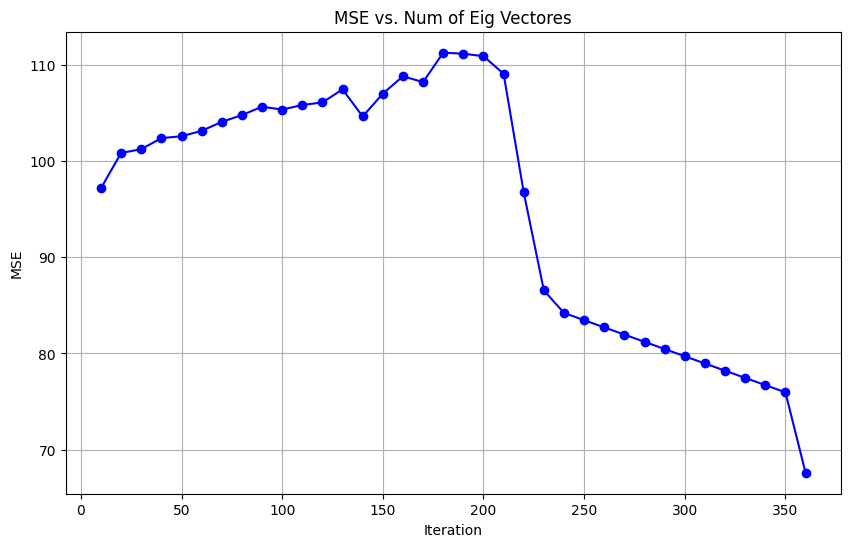

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(Num_of_Components, mse_values, marker='o', color='b', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Num of Eig Vectores')
plt.grid(True)
plt.show()